In [42]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import cv2
import time
import os
from IPython.display import clear_output

In [43]:
files = ['Good', 'Bad']
address = '/media/debrc/Data/Codings/Meat-Gradation-PROJ/Dataset/Chicken/'

In [44]:
data = {}
for f in files:
    data[f]=[]

In [45]:
for col in files:
    os.chdir(address+col)
    for i in os.listdir(os.getcwd()):
        if i.endswith('.jpg'):
            data[col].append(i)

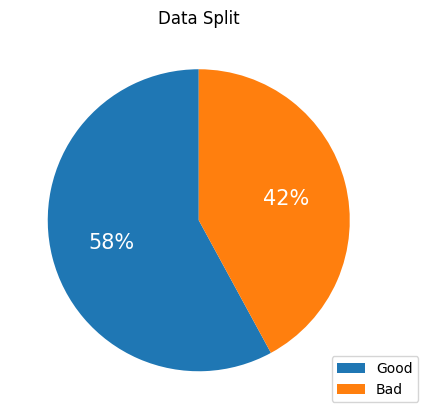

In [46]:
sizes = [len(data['Good']), len(data['Bad'])]
plt.figure(figsize=(10,5), dpi=100)
plt.pie(x=sizes,autopct='%1.0f%%',shadow=False, textprops={'color':"w","fontsize":15}, startangle=90)
plt.legend(files,bbox_to_anchor=(0.4, 0, .7, 1))
plt.title("Data Split")
plt.show()

In [47]:
width = 100
height = 100
start = time.time()
image_data = []
image_target = []

for title in files:
    os.chdir(address+title)
    counter = 0
    for i in data[title]:
        img = cv2.imread(i)
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB) 
        image_data.append(cv2.resize(img,(width, height)))
        image_target.append(title)
        counter += 1
#         if counter == sample_size:
#             break
    clear_output(wait=True)
    print("Compiled Class",title)
calculate_time = time.time() - start    
print("Calculate Time",round(calculate_time,5))

Compiled Class Bad
Calculate Time 32.24663


In [48]:
image_data = np.array(image_data)
size = image_data.shape[0]
image_data.shape

(290, 100, 100, 3)

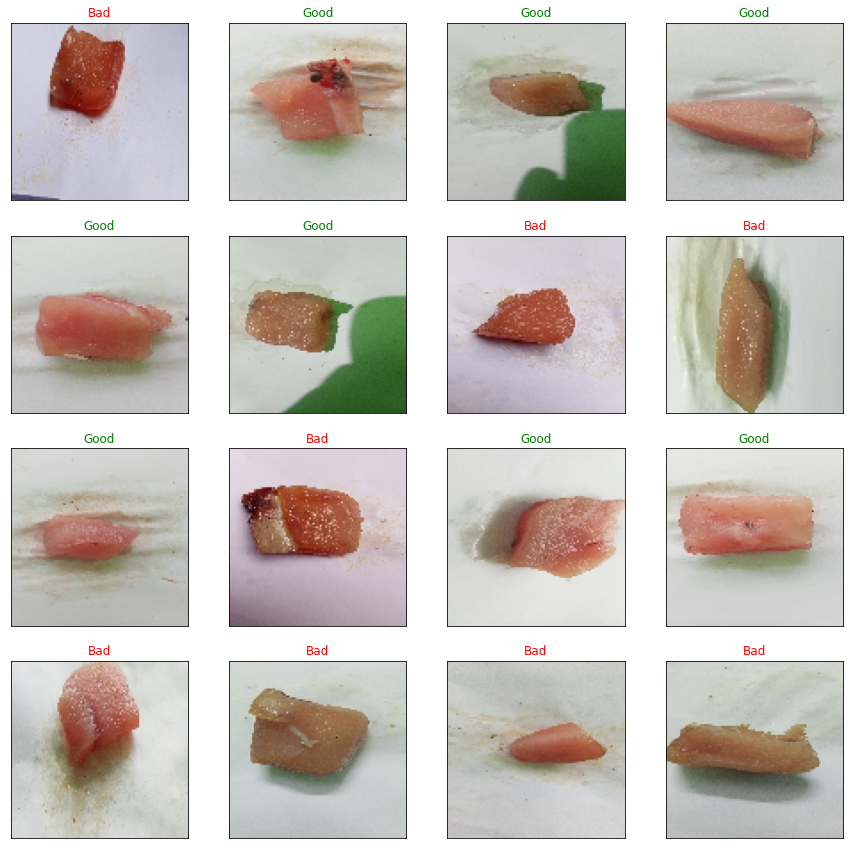

In [49]:
plt.figure(figsize=(15,15))
for i in range(1,17):
    fig = np.random.choice(np.arange(size))
    plt.subplot(4,4,i)
    plt.imshow(image_data[fig])
    if image_target[fig]=='Good':
        c='green'
#     elif image_target[fig]=='Intermediate':
#         c='yellow'
    else:
        c='red'
    plt.title(image_target[fig], color=c)
    plt.xticks([]), plt.yticks([])
plt.show()

In [52]:
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'

import tensorflow as tf

from tensorflow.keras import datasets, layers, models

from sklearn.preprocessing import LabelEncoder

from sklearn.model_selection import train_test_split

In [53]:
labels = LabelEncoder()
labels.fit(image_target)

LabelEncoder()

In [54]:
X = image_data / 255.0
y = labels.transform(image_target)
train_images, test_images, train_labels, test_labels = train_test_split(X,y, test_size=0.3, random_state=123)

In [57]:
model = models.Sequential()
model.add(layers.Conv2D(35, (3, 3), activation='relu', input_shape=(width,height,3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))

2022-11-02 10:02:50.905562: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /home/debrc/.local/lib/python3.8/site-packages/cv2/../../lib64:
2022-11-02 10:02:50.905616: W tensorflow/stream_executor/cuda/cuda_driver.cc:263] failed call to cuInit: UNKNOWN ERROR (303)
2022-11-02 10:02:50.905653: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (debrc-magicbook): /proc/driver/nvidia/version does not exist
2022-11-02 10:02:50.906838: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [58]:
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(2))

In [59]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

history = model.fit(train_images, train_labels, epochs=10, 
                    validation_data=(test_images, test_labels))

Epoch 1/10


2022-11-02 10:05:02.565582: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 24360000 exceeds 10% of free system memory.
2022-11-02 10:05:03.185403: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 43025920 exceeds 10% of free system memory.
2022-11-02 10:05:03.244339: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 18096128 exceeds 10% of free system memory.
2022-11-02 10:05:03.292696: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 25401600 exceeds 10% of free system memory.
2022-11-02 10:05:03.293508: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 25401600 exceeds 10% of free system memory.


7/7 [==============================] - 3s 296ms/step - loss: 0.8163 - accuracy: 0.5172 - val_loss: 0.6861 - val_accuracy: 0.5747
Epoch 2/10
7/7 [==============================] - 2s 244ms/step - loss: 0.6706 - accuracy: 0.5862 - val_loss: 0.7273 - val_accuracy: 0.4253
Epoch 3/10
7/7 [==============================] - 2s 239ms/step - loss: 0.6851 - accuracy: 0.5764 - val_loss: 0.6500 - val_accuracy: 0.6092
Epoch 4/10
7/7 [==============================] - 2s 258ms/step - loss: 0.6090 - accuracy: 0.6995 - val_loss: 0.6658 - val_accuracy: 0.4828
Epoch 5/10
7/7 [==============================] - 2s 249ms/step - loss: 0.5645 - accuracy: 0.6749 - val_loss: 0.5673 - val_accuracy: 0.7356
Epoch 6/10
7/7 [==============================] - 2s 243ms/step - loss: 0.4797 - accuracy: 0.7734 - val_loss: 0.6581 - val_accuracy: 0.5977
Epoch 7/10
7/7 [==============================] - 2s 243ms/step - loss: 0.4434 - accuracy: 0.7931 - val_loss: 0.4746 - val_accuracy: 0.7931
Epoch 8/10
7/7 [===============

3/3 - 0s - loss: 0.3503 - accuracy: 0.8736 - 190ms/epoch - 63ms/step


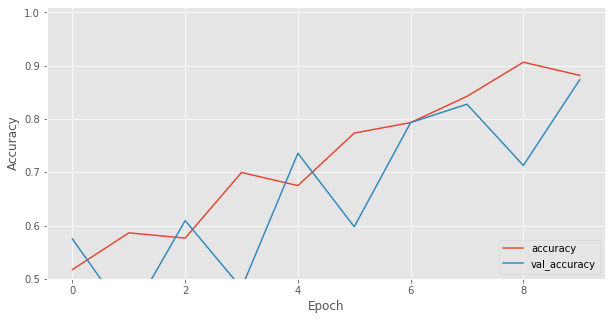

In [60]:
plt.style.use('ggplot')
plt.figure(figsize=(10, 5))
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1.01])
plt.legend(loc='lower right')

test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

In [61]:
result=model.evaluate(test_images, test_labels)

3/3 [==============================] - 0s 54ms/step - loss: 0.3503 - accuracy: 0.8736


In [62]:
for i in range(len(model.metrics_names)):
    print(model.metrics_names[i],":",result[i])

loss : 0.3502640128135681
accuracy : 0.8735632300376892


In [63]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 98, 98, 35)        980       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 49, 49, 35)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 47, 47, 64)        20224     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 23, 23, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 21, 21, 64)        36928     
                                                                 
 flatten (Flatten)           (None, 28224)             0

In [64]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

3/3 [==============================] - 0s 58ms/step


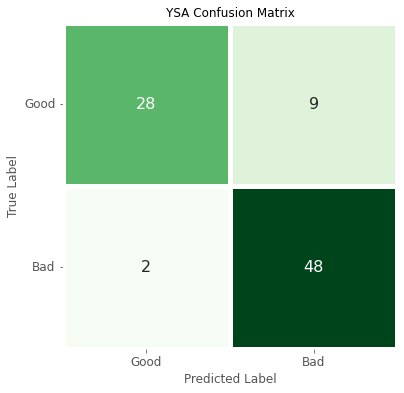

In [65]:
y_pred = model.predict(test_images)

def toClass(pred):
    
    class_ = np.zeros(len(pred))
    for i in range(len(pred)):
        index = pred[i].argmax()
        class_[i] = index
        
    return class_

cm = confusion_matrix(test_labels,toClass(y_pred))

df1 = pd.DataFrame(columns=["Good","Bad"], index= ["Good","Bad"], data= cm )

f,ax = plt.subplots(figsize=(6,6))

sns.heatmap(df1, annot=True,cmap="Greens", fmt= '.0f',ax=ax,linewidths = 5, cbar = False,annot_kws={"size": 16})
plt.xlabel("Predicted Label")
plt.xticks(size = 12)
plt.yticks(size = 12, rotation = 0)
plt.ylabel("True Label")
plt.title("YSA Confusion Matrix", size = 12)
plt.show()

In [66]:
def Prediction(image):
    
    global width, height, files, labels
    
    img = cv2.resize(image,(width,height))
    
    test = img / 255.0
    
    pred = model.predict(np.array([image])).argmax()
    
    return labels.inverse_transform([pred])[0]

1/1 [==============================] - 0s 29ms/step


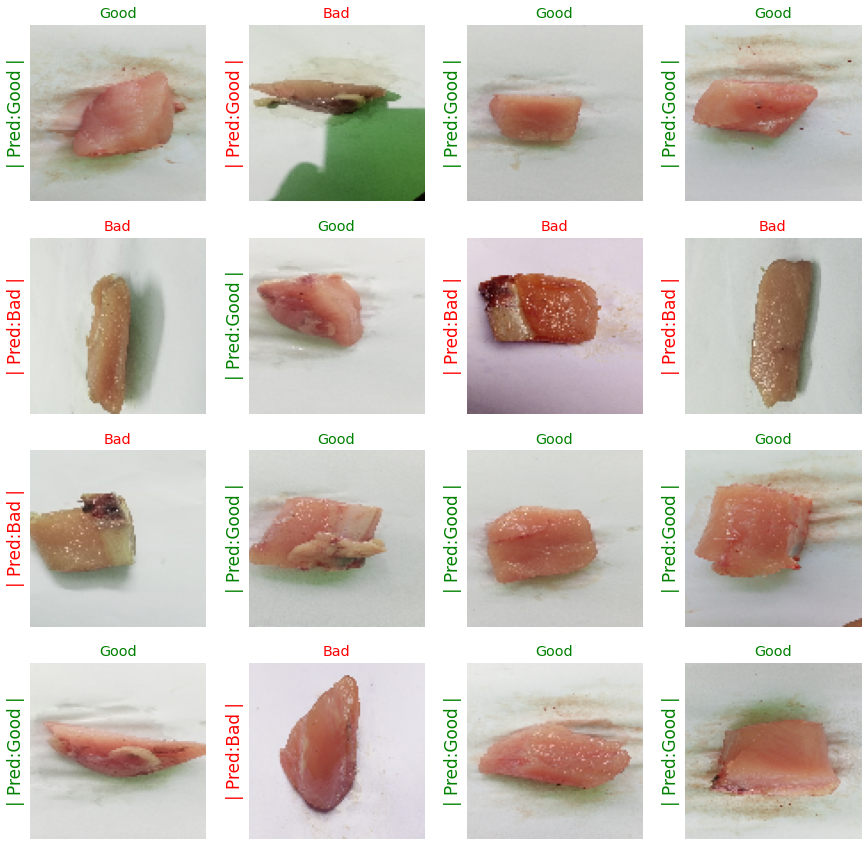

In [67]:
plt.figure(figsize=(15,15))
for i in range(1,17):
    fig = np.random.choice(np.arange(size))
    plt.subplot(4,4,i)
    plt.imshow(image_data[fig])
    if image_target[fig]=='Good':
        c='green'
    else:
        c='red'
    plt.title(image_target[fig], color=c)
    plt.ylabel("| Pred:{} |".format(Prediction(image_data[fig])),fontsize=17, color=c)
    plt.xticks([]), plt.yticks([])
plt.show()